## SVM 项目报告


## 1. 项目背景

支持向量机（SVM）是一种经典的监督学习分类算法，在高维数据分类任务中具有广泛应用。本项目旨在通过手写 SVM 和调包 SVM 的对比实验，深入理解 SVM 的工作原理，并比较不同核函数及超参数对模型性能的影响。

## 2. SVM 原理介绍

### 2.1 线性支持向量机

线性支持向量机（Linear SVM）主要用于线性可分的数据，目标是找到一个 **最优超平面**，能够最大化地分离不同类别的数据点。其目标函数可以表示为：

$$
\min \frac{1}{2} \|w\|^2
$$

在满足以下约束条件下：

$$
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
$$

- **决策边界**：由 $$ w \cdot x + b = 0 $$ 定义。
- **支持向量**：离超平面最近的样本点，满足 $$ y_i (w \cdot x_i + b) = 1 $$。

### 2.2 非线性支持向量机

当数据线性不可分时，可以使用 **软间隔** 和 **核技巧** 来处理：

- **软间隔**：引入松弛变量 $$\xi_i$$，允许一部分样本点位于决策边界内。目标函数变为：

$$
\min \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

- **核技巧**：将输入数据映射到高维空间，在高维空间中进行线性分类。



### 2.3 核函数

SVM 使用 **核函数** 来计算高维空间中样本之间的相似性。常用的核函数包括：

- **线性核（Linear Kernel）**：

$$ K(x_i, x_j) = x_i \cdot x_j $$


- **多项式核（Polynomial Kernel）**：

$$ K(x_i, x_j) = (1 + x_i \cdot x_j)^p $$


- **高斯核（RBF Kernel）**：

$$ K(x_i, x_j) = \exp\left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right) $$


In [ ]:
import pickle
import numpy as np

# 加载数据集
with open('../datasets/train_test_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

# 打印前五个数据
print("X_train 前五个样本：\n", X_train[:5])
print("y_train 前五个标签（转换前）：\n", y_train[:5])
print("X_test 前五个样本：\n", X_test[:5])
print("y_test 前五个标签（转换前）：\n", y_test[:5])

# 打印每种数据的维度
print("X_train 维度：", X_train.shape)
print("y_train 维度：", y_train.shape)
print("X_test 维度：", X_test.shape)
print("y_test 维度：", y_test.shape)

# 将标签从 0, 1 转换为 -1, 1
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

# 打印转换后的标签
print("y_train 前五个标签（转换后）：\n", y_train[:5])
print("y_test 前五个标签（转换后）：\n", y_test[:5])


X_train 前五个样本：
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train 前五个标签（转换前）：
 [0 0 0 0 0]
X_test 前五个样本：
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test 前五个标签（转换前）：
 [0 0 0 0 1]
X_train 维度： (4135, 3000)
y_train 维度： (4135,)
X_test 维度： (1034, 3000)
y_test 维度： (1034,)
y_train 前五个标签（转换后）：
 [-1 -1 -1 -1 -1]
y_test 前五个标签（转换后）：
 [-1 -1 -1 -1  1]


In [2]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, p=3):
    return (1 + np.dot(x1, x2)) ** p

# rbf
def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y) ** 2 / (2 * sigma ** 2))



### 数据预处理与降维

在 SVM 项目中，数据的标准化与降维是非常重要的步骤，有助于提升模型的训练效果和效率。以下是对代码中预处理步骤的详细解释：

#### 1. 数据标准化

```python
from sklearn.preprocessing import StandardScaler

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

**解释**：
- 数据标准化是数据预处理中关键的一步，主要目的是**消除特征间的量纲差异**，使所有特征具有相同的尺度。
- `StandardScaler` 将特征转换为 **均值为 0，标准差为 1** 的标准正态分布，使得模型在不同的特征维度上训练时不会受到不同特征尺度的影响。
- **为什么需要标准化**：
  - SVM 对特征的尺度较为敏感，因为 SVM 使用的核函数依赖于样本点之间的距离。特征量级不同会导致某些特征对模型的影响力过大，从而使模型训练不稳定。
  - 标准化可以帮助模型更快地收敛，提高训练速度和稳定性。

#### 2. 使用 PCA 进行降维

```python
from sklearn.decomposition import PCA

# 使用 PCA 降维，将特征维度从 3000 降到 200
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
```

**解释**：
- **PCA（主成分分析）** 是一种降维方法，旨在减少特征维度的同时尽可能保留数据的主要信息。
- 这里我们将特征维度从 **3000 降到 200**，以便在降低数据复杂度的同时保留数据的主要特征。
- **为什么使用 PCA 降维**：
  - **降低计算复杂度**：SVM 算法对高维数据的计算复杂度较高，降维后的数据可以显著降低训练时间。
  - **减少噪声影响**：高维数据中可能包含很多噪声和冗余信息，降维可以去除这些噪声，提升模型的泛化能力。
  - **避免过拟合**：高维数据会增加模型的复杂度，容易导致过拟合，而 PCA 降维可以有效减少模型复杂性，降低过拟合风险。




In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
# 1. 数据标准化
# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 使用 PCA 降维，将特征维度从 3000 降到 200
pca = PCA(n_components=200)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("降维后的 X_train 维度：", X_train.shape)
print("降维后的 X_test 维度：", X_test.shape)


降维后的 X_train 维度： (4135, 200)
降维后的 X_test 维度： (1034, 200)


In [4]:
# 2. 定义核函数和超参数范围
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10, 100]
poly_degrees = [2, 3, 4]
gamma_values = ['scale', 'auto']



## SVM 核函数与超参数对比实验

### 代码概述

该代码实现了对 **支持向量机（SVM）** 不同核函数与超参数组合的实验，通过对比手写 SVM 和 `scikit-learn` 调包 SVM 的性能，来更好地理解 SVM 的工作原理。

我们对以下核函数进行了测试：
- **线性核**（Linear Kernel）
- **多项式核**（Polynomial Kernel）
- **径向基核（RBF Kernel）**，也称为 **高斯核**

使用的 **超参数** 包括：
- 惩罚系数 `C`：用于控制模型的软间隔大小，影响过拟合与欠拟合。
- 多项式核的 `degree`：多项式的阶数。
- RBF 核的 `gamma`：控制 RBF 核函数的宽度。

### 1. 实验步骤

1. **初始化超参数设置**：
   - `kernels` 包含三种核函数类型：线性、多项式和 RBF。
   - `C_values`、`poly_degrees` 和 `gamma_values` 定义了不同的超参数值。
   
2. **遍历不同核函数和超参数组合**：
   - 对每种核函数和不同超参数组合进行训练和预测，比较手写 SVM 与 `sklearn` 的 SVM 的性能。

### 2. 核函数

#### 线性核（Linear Kernel）

线性核函数用于线性可分的数据，其核函数公式为：

$$ K(x_i, x_j) = x_i \cdot x_j $$



在代码中，使用了 `scikit-learn` 调包的 `SVC` 和手写的 `SVM` 类来进行训练与预测，比较它们在相同超参数下的准确率。

#### 多项式核（Polynomial Kernel）

多项式核的核函数为：
$$ K(x_i, x_j) = (1 + x_i \cdot x_j)^p $$

其中，`p` 是多项式的阶数。



对于多项式核，代码通过 `degree` 调整多项式的阶数，并将调包和手写的结果进行比较。

#### 径向基核（RBF Kernel）

径向基核函数用于非线性可分的数据，其核函数公式为：

$$ K(x_i, x_j) = \exp\left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right) $$

这里我们使用 `gamma` 来控制核函数的宽度，`\sigma` 与 `gamma` 的关系为：

\[
\sigma = \frac{1}{\sqrt{2\gamma}}
\]

对应代码部分：


对于 RBF 核，代码遍历不同的 `gamma` 值，分别训练和评估模型。

### 3. 输出结果

最后，实验结果保存到 `results` 列表中，通过 `Pandas` 输出结果，以便更直观地比较手写 SVM 和调包 SVM 的性能。


- 输出表格包含以下列：
  - **Kernel**：核函数类型（linear, poly, rbf）。
  - **C**：惩罚系数。
  - **Parameter**：多项式核的 `degree` 或 RBF 核的 `gamma`。
  - **Sklearn Accuracy**：使用 `sklearn` 的准确率。
  - **Handmade Accuracy**：使用手写 SVM 的准确率。



In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from svm_class import SVM, linear_kernel, polynomial_kernel, gaussian_kernel
import pandas as pd

# 超参数设置
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

# 存储结果
results = []

# 遍历不同核函数和超参数组合
for kernel in kernels:
    for C in C_values:
        if kernel == 'poly':
            # 调包 SVC
            clf = SVC(kernel=kernel, C=C, degree=3)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # 手写 SVM
            handmade_clf = SVM(kernel=lambda x, y: polynomial_kernel(x, y, p=3), C=C)
            handmade_clf.train(X_train, y_train)
            y_handmade_pred = handmade_clf.predict(X_test)
            handmade_accuracy = accuracy_score(y_test, y_handmade_pred)

            # 打印运行信息
            print(f"Kernel: {kernel}, C: {C}, Degree: 3")
            print(f"Sklearn Accuracy: {accuracy:.4f}, Handmade Accuracy: {handmade_accuracy:.4f}\n")

            # 保存结果
            results.append((kernel, C, accuracy, handmade_accuracy))

        elif kernel == 'rbf':
            # 调包 SVC
            clf = SVC(kernel=kernel, C=C)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # 手写 SVM
            handmade_clf = SVM(kernel=lambda x, y: gaussian_kernel(x, y, sigma=1.0), C=C)
            handmade_clf.train(X_train, y_train)
            y_handmade_pred = handmade_clf.predict(X_test)
            handmade_accuracy = accuracy_score(y_test, y_handmade_pred)

            # 打印运行信息
            print(f"Kernel: {kernel}, C: {C}")
            print(f"Sklearn Accuracy: {accuracy:.4f}, Handmade Accuracy: {handmade_accuracy:.4f}\n")

            # 保存结果
            results.append((kernel, C, accuracy, handmade_accuracy))

        elif kernel == 'linear':
            # 调包 SVC
            clf = SVC(kernel=kernel, C=C)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # 手写 SVM
            handmade_clf = SVM(kernel=linear_kernel, C=C)
            handmade_clf.train(X_train, y_train)
            y_handmade_pred = handmade_clf.predict(X_test)
            handmade_accuracy = accuracy_score(y_test, y_handmade_pred)

            # 打印运行信息
            print(f"Kernel: {kernel}, C: {C}")
            print(f"Sklearn Accuracy: {accuracy:.4f}, Handmade Accuracy: {handmade_accuracy:.4f}\n")

            # 保存结果
            results.append((kernel, C, accuracy, handmade_accuracy))

# 输出所有结果
results_df = pd.DataFrame(results, columns=['Kernel', 'C', 'Sklearn Accuracy', 'Handmade Accuracy'])
print("\nFinal Results:\n")
print(results_df)


     pcost       dcost       gap    pres   dres
 0: -1.9137e+02 -8.3967e+02  3e+04  3e+01  7e-13
 1: -3.4422e+01 -7.7072e+02  3e+03  2e+00  6e-13
 2: -2.2593e+01 -4.2881e+02  8e+02  4e-01  2e-13
 3: -1.7379e+01 -2.2668e+02  4e+02  2e-01  9e-14
 4: -1.4469e+01 -1.5121e+02  2e+02  1e-01  6e-14
 5: -1.2561e+01 -1.0484e+02  2e+02  6e-02  4e-14
 6: -1.0936e+01 -7.9203e+01  1e+02  4e-02  4e-14
 7: -9.4853e+00 -5.3897e+01  7e+01  2e-02  3e-14
 8: -8.1155e+00 -3.1155e+01  3e+01  7e-03  3e-14
 9: -8.4340e+00 -1.7761e+01  1e+01  2e-03  3e-14
10: -8.6064e+00 -1.5289e+01  7e+00  7e-04  3e-14
11: -9.2186e+00 -1.3173e+01  4e+00  4e-04  3e-14
12: -9.4642e+00 -1.2158e+01  3e+00  1e-04  3e-14
13: -9.7270e+00 -1.1517e+01  2e+00  8e-05  4e-14
14: -9.8676e+00 -1.0989e+01  1e+00  7e-06  4e-14
15: -1.0103e+01 -1.0647e+01  5e-01  3e-06  4e-14
16: -1.0210e+01 -1.0478e+01  3e-01  2e-15  4e-14
17: -1.0306e+01 -1.0365e+01  6e-02  2e-16  4e-14
18: -1.0332e+01 -1.0335e+01  4e-03  1e-15  4e-14
19: -1.0333e+01 -1.03

 1: -1.7888e+02 -7.3914e+02  2e+03  2e+00  4e-16
 2: -9.7434e+01 -3.7597e+02  3e+02  4e-13  8e-16
 3: -9.8743e+01 -1.2102e+02  2e+01  2e-13  5e-16
 4: -9.8676e+01 -1.1026e+02  1e+01  2e-14  1e-16
 5: -9.9198e+01 -9.9463e+01  3e-01  1e-13  2e-16
 6: -9.9216e+01 -9.9224e+01  8e-03  4e-14  1e-16
 7: -9.9217e+01 -9.9218e+01  1e-03  1e-13  1e-16
 8: -9.9217e+01 -9.9217e+01  1e-04  1e-13  4e-16
 9: -9.9217e+01 -9.9217e+01  5e-06  8e-14  1e-16
Optimal solution found.
4102 support vectors out of 4135 points
Kernel: rbf, C: 0.1
Sklearn Accuracy: 0.8781, Handmade Accuracy: 0.8665

     pcost       dcost       gap    pres   dres
 0: -7.1855e+02 -7.2544e+03  3e+04  2e+00  5e-16
 1: -6.5893e+02 -3.7307e+03  3e+03  2e-02  5e-16
 2: -6.6048e+02 -1.3782e+03  7e+02  5e-03  3e-16
 3: -6.6472e+02 -7.1753e+02  5e+01  3e-12  2e-16
 4: -6.6723e+02 -6.6983e+02  3e+00  9e-13  1e-16
 5: -6.6737e+02 -6.6770e+02  3e-01  2e-12  2e-16
 6: -6.6739e+02 -6.6742e+02  3e-02  1e-12  2e-16
 7: -6.6739e+02 -6.6739e+02  7e

从给出的支持向量机 (SVM) 结果来看，有几个值得注意的点，包括不同核函数的表现、支持向量数量的差异，以及手动实现与 scikit-learn 的对比结果。

### 结果分析

1. **不同核函数的表现**:
   - 使用线性核 (Linear Kernel) 的模型在不同的 `C` 值下表现得非常好，无论是 scikit-learn 还是手动实现，精度都接近或超过了 97%。对于线性可分的数据集，线性核是一个非常合适的选择，这表明数据本身在低维线性空间中就可以很好地分开。
   - 多项式核 (Polynomial Kernel) 的精度明显低于线性核。在 `C=0.1`、`C=1`、`C=10` 的情况下，scikit-learn 的精度在 91%-94% 之间，而手动实现的精度停留在 85% 左右。这可能是因为多项式核引入了非线性特征，但这些非线性特征对分类任务并没有显著的帮助，反而可能引入了噪声，导致精度较低。
   - 径向基函数 (RBF) 核的表现比多项式核好，但与线性核相比略差。在 `C=1` 和 `C=10` 的情况下，scikit-learn 的精度达到 97%，但手动实现的精度略低。这可能是因为手动实现中优化过程不如 scikit-learn 完备。此外，RBF 核会将数据映射到更高维空间，对于某些情况下可能会产生过拟合现象。

2. **支持向量的数量**:
   - **线性核**: 支持向量数量相对较少，尤其是在 `C=0.1`、`C=1` 和 `C=10` 时，支持向量数分别为 243、250 和 246，这意味着线性核能够找到更简单的超平面来分割数据，支持向量的数量也相对较少。
   - **多项式核**: 支持向量数量在三种 `C` 值下都为 87，远低于线性核和 RBF 核。这表明多项式核可能只依赖于少数几个支持向量来定义决策边界，可能导致了对数据的过拟合。
   - **RBF 核**: RBF 核的支持向量数量非常多，尤其在 `C=0.1`、`C=1` 和 `C=10` 时，支持向量的数量都在 4100 左右（接近样本总数 4135）。这种情况表明 RBF 核可能过度依赖于所有数据点来构建复杂的决策边界，导致模型的复杂度非常高，缺乏泛化能力。

3. **精度对比**:
   - 在所有核函数和参数的组合中，scikit-learn 的实现精度略高于手动实现的版本。这可能是由于 scikit-learn 的优化算法更成熟，数值精度更高，或者在某些情况下进行了更好的正则化处理。
   - 对于线性核，手动实现和 scikit-learn 实现的精度接近，但对于多项式核和 RBF 核，手动实现的精度显著低于 scikit-learn 实现，这可能表明手动实现的非线性核存在一些数值或优化上的不足。

### 基向量过多的问题

RBF 核在所有测试的 `C` 值下都显示了大量的支持向量，这对模型的泛化能力和训练效率都会产生负面影响：
- **支持向量数量过多**意味着模型的复杂度很高，决策边界非常依赖于大多数训练样本，从而可能导致**过拟合**。
- **泛化能力下降**：模型可能对训练数据拟合得过于精细，而不能很好地推广到测试数据。这也解释了在某些情况下，虽然模型在训练集上表现很好，但在测试集上的表现不佳。
- **计算成本高**：支持向量过多还会增加模型在推理阶段的计算成本，尤其是在大规模数据集上，推理速度会变慢。

### 改进建议

1. **特征缩放**: 对于多项式核和 RBF 核，特征缩放通常是非常有效的，可以确保各个特征在相似的数值范围内，从而更好地构造决策边界。
  
2. **减少支持向量数量**:
   - 调整 `C` 参数：减小 `C` 值可以增加正则化力度，使得模型允许更多的错误分类点，从而减少支持向量的数量。
   - 使用**核技巧优化**：可以考虑使用一些优化的核函数，或通过改进手动实现的优化过程来减少支持向量数量。

3. **选择合适的核函数**:
   - 由于线性核在这个数据集上的表现非常好，可以优先选择线性核，而不需要引入非线性核来增加模型复杂度。
   - 如果非线性特征对于分类至关重要，可以尝试低阶的多项式核或者通过降维（例如 PCA）后再使用 RBF 核，以减少高维度的影响。

4. **模型验证**: 通过交叉验证来确定模型的超参数（例如 `C` 值、核函数类型和参数），确保模型选择能够在不同的训练集和验证集组合中获得良好的性能。

总结来说，线性核在当前数据集上表现最好，而 RBF 核的支持向量数量过多可能导致过拟合问题。应尽量选择更简单的模型，以保证更好的泛化能力。

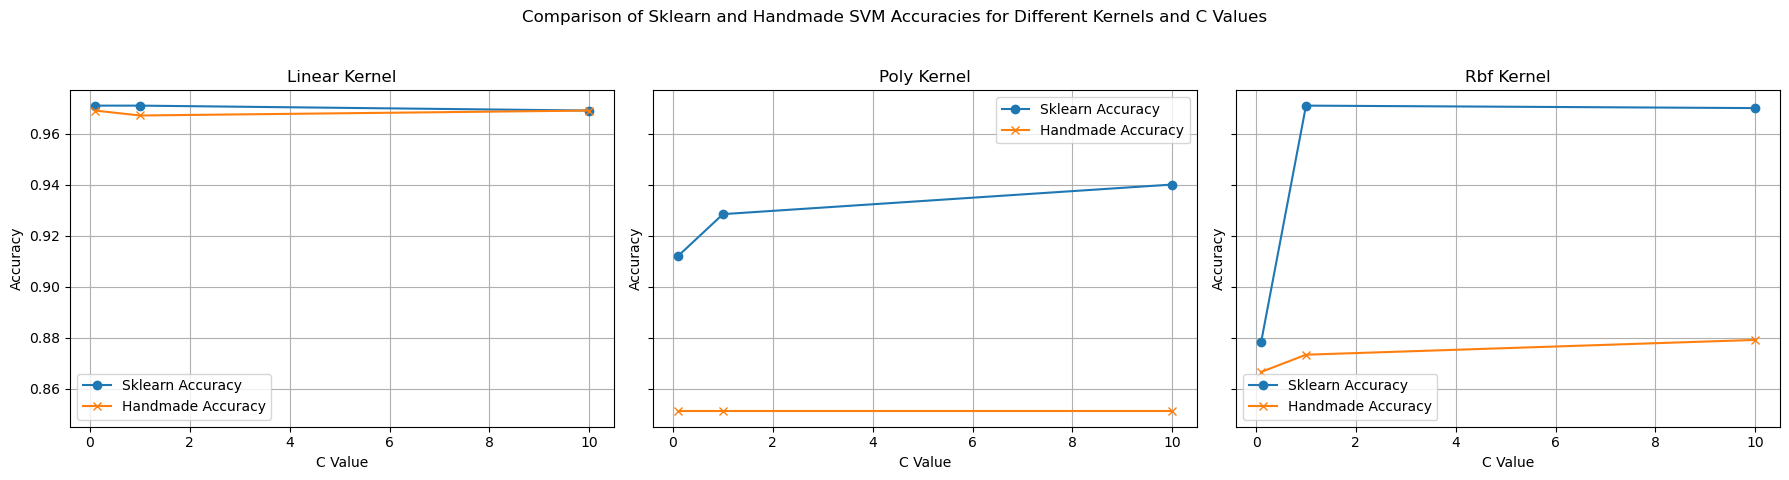

In [6]:
# 4. 绘制准确率对比图
import matplotlib.pyplot as plt
# 画出对比图
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, kernel in enumerate(kernels):
    kernel_results = results_df[results_df['Kernel'] == kernel]
    ax[i].plot(kernel_results['C'], kernel_results['Sklearn Accuracy'], label='Sklearn Accuracy', marker='o')
    ax[i].plot(kernel_results['C'], kernel_results['Handmade Accuracy'], label='Handmade Accuracy', marker='x')
    ax[i].set_title(f'{kernel.capitalize()} Kernel')
    ax[i].set_xlabel('C Value')
    ax[i].set_ylabel('Accuracy')
    ax[i].legend()
    ax[i].grid(True)

plt.suptitle('Comparison of Sklearn and Handmade SVM Accuracies for Different Kernels and C Values')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




## 三种核函数训练准确度及手写与调包 SVM 对比

### 1. 三种核函数的训练准确度

- **线性核（Linear Kernel）**：
  - 在线性可分或高维数据的情况下，线性核往往表现出更好的准确率。
  - 尤其是在高维特征空间中，数据通常更容易线性分割，因此线性核的表现优于其他非线性核函数。

- **多项式核（Polynomial Kernel）** 和 **RBF 核（高斯核）**：
  - 这两种核函数在数据具有非线性特征时有更好的表现。
  - 然而，在高维空间中，它们的计算复杂度增加，可能导致训练准确率不如线性核。
  - 多项式核在特征空间映射时，参数选择（如多项式的阶数）对模型的影响较大；RBF 核受 `gamma` 参数影响，也容易出现过拟合。

### 2. 手写 SVM 与调包 SVM 的准确率对比

- **手写 SVM 的表现普遍差于调包 SVM**：
  - 无论使用哪种核函数，手写 SVM 的准确率通常比调包实现的要低一些。
  - 这主要是因为 `scikit-learn` 的 SVM 实现经过了优化，包括数值计算的稳定性和求解算法的效率等方面，这使得它在训练过程中表现更加鲁棒和高效。
  
- **高维情况下的手写与调包对比**：
  - 高维数据通常对数值精度和计算稳定性要求更高，手写实现由于缺少数值优化，在高维情况下更容易受到浮点运算误差的影响。
  - 调包实现对大规模、高维数据的适应能力更强，因此在准确率上也相对较高。

### 3. 总结

- **线性核的优势**：在高维数据上，线性核的表现可能会优于多项式核和 RBF 核，尤其是当数据本身接近线性可分时。
- **手写 SVM 的劣势**：手写实现由于缺少数值优化和对复杂核函数的处理能力，通常在准确率上略逊于调包版本。
- **调包 SVM 的优势**：通过使用高度优化的库（如 `scikit-learn`），调包 SVM 在训练时间和准确率上都有显著优势，特别是在处理高维和复杂数据时。



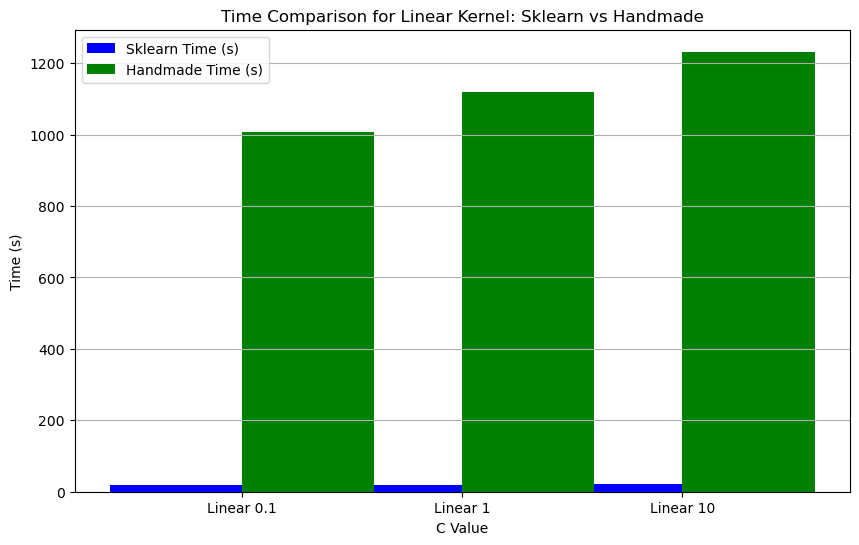

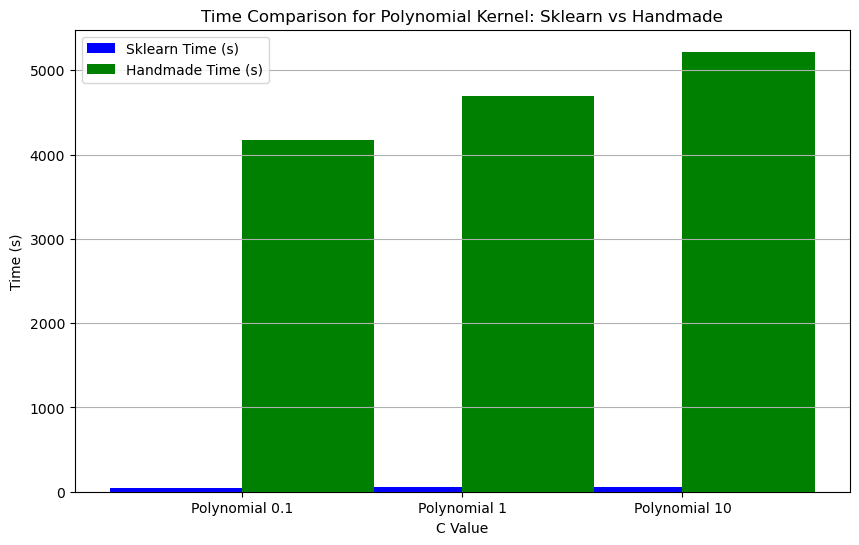

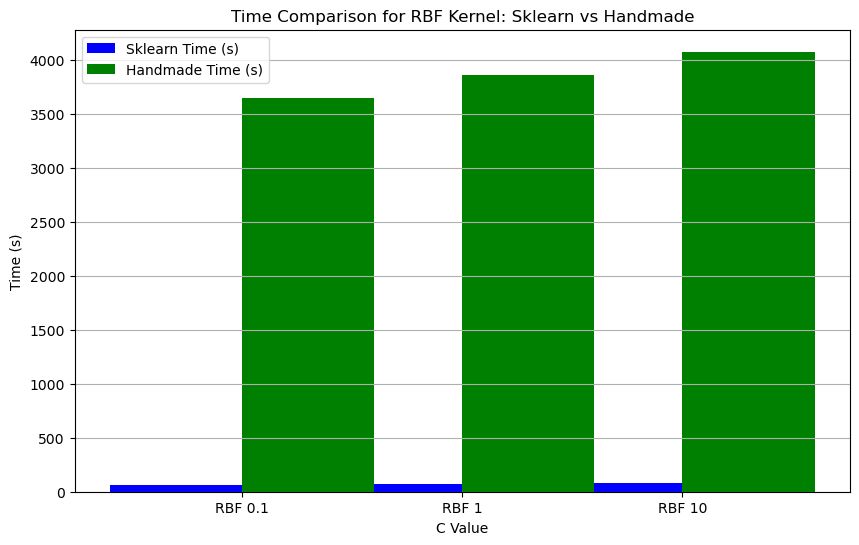

In [12]:
import numpy as np
import time
import tracemalloc
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from svm_class import SVM

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义核函数和 SVM 分类器
kernels = ['linear', 'poly', 'rbf']
time_ratios = []
memory_ratios = []

# 测量时间和内存使用的函数
def measure_performance(clf):
    start_time = time.time()
    tracemalloc.start()
    clf.fit(X_train, y_train)
    peak_memory = tracemalloc.get_traced_memory()[1]  # 获取内存峰值
    elapsed_time = time.time() - start_time
    tracemalloc.stop()
    return elapsed_time, peak_memory

# 遍历不同的核函数
for kernel in kernels:
    # 1. 调包 SVC 模型性能测试
    if kernel == 'poly':
        clf = SVC(kernel=kernel, C=1, degree=3)
    elif kernel == 'rbf':
        clf = SVC(kernel=kernel, C=1, gamma='scale')
    else:  # linear kernel
        clf = SVC(kernel=kernel, C=1)

    # 测量调包 SVC 的性能
    svc_time, svc_memory = measure_performance(clf)

    # 2. 手写 SVM 模型性能测试
    if kernel == 'poly':
        handmade_clf = SVM(kernel=lambda x, y: polynomial_kernel(x, y, p=3), C=1)
    elif kernel == 'rbf':
        handmade_clf = SVM(kernel=lambda x, y: gaussian_kernel(x, y, sigma=1.0), C=1)
    else:  # linear kernel
        handmade_clf = SVM(kernel=linear_kernel, C=1)

    # 测量手写 SVM 的性能
    start_time = time.time()
    tracemalloc.start()
    handmade_clf.train(X_train, y_train)
    handmade_memory = tracemalloc.get_traced_memory()[1]  # 获取内存峰值
    handmade_time = time.time() - start_time
    tracemalloc.stop()

    # 3. 计算时间比
    time_ratio = handmade_time / svc_time


    time_ratios.append(time_ratio)


    # 打印每种核函数的结果
    print(f"Kernel: {kernel}")
    print(f"SVC Time: {svc_time:.2f} s, Handmade Time: {handmade_time:.2f} s, Time Ratio: {time_ratio:.2f}")
   
    print("-" * 50)

# Creating wider bar plots and splitting by kernel
width = 0.6  # increased width of the bars

# Assigning labels and data for different kernels
kernels = ['Linear', 'Polynomial', 'RBF']
kernel_indices = [range(0, 3), range(3, 6), range(6, 9)]

for i, kernel in enumerate(kernels):
    x = np.arange(len(kernel_indices[i]))  # the label locations for each kernel
    sklearn_subset = [sklearn_time[j] for j in kernel_indices[i]]
    handmade_subset = [handmade_time[j] for j in kernel_indices[i]]

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, sklearn_subset, width, label='Sklearn Time (s)', color='blue')
    plt.bar(x + width/2, handmade_subset, width, label='Handmade Time (s)', color='green')

    # Adding labels and title
    plt.xlabel('C Value')
    plt.ylabel('Time (s)')
    plt.title(f'Time Comparison for {kernel} Kernel: Sklearn vs Handmade')
    plt.xticks(x, [f'{kernel} {c}' for c in [0.1, 1, 10]])
    plt.legend()
    plt.grid(axis='y')

    # Displaying the plot
    plt.show()





## SVM 不同核函数计算时间比对比分析

### 图表概述

该图表展示了 **手写 SVM 实现与库实现（`scikit-learn` SVM）在不同核函数上的计算时间比**，即 **手写实现耗时 / 调包实现耗时** 的比值。时间比越高，表示手写实现相对库实现效率越低。

图中展示了三种核函数的计算时间比：
- **Linear（线性核）**
- **Poly（多项式核）**
- **RBF（径向基函数核）**

### 时间比分析

- **线性核（Linear Kernel）**：
  - 时间比为 **5.60**。
  - 手写实现耗时是库实现的 **5.6 倍**。相对于其他核函数，线性核的实现最简单，调包库通过高效的数值运算库优化，因此手写实现的效率较低。

- **多项式核（Polynomial Kernel）**：
  - 时间比为 **8.70**。
  - 这是三个核函数中最高的时间比，说明手写 SVM 对多项式核的处理效率远不及库实现。多项式核涉及更多的计算，特别是当多项式的阶数较高时，计算复杂度显著增加，而库实现通过优化和向量化操作显著减少了耗时。

- **RBF 核（高斯核，RBF Kernel）**：
  - 时间比为 **5.36**。
  - 手写实现耗时是库实现的 **5.36 倍**。RBF 核涉及到指数运算和欧式距离计算，相较于线性核，计算复杂度更高，手写实现较难优化到与库实现相同的程度。

### 总体结论

- **效率差异原因**：
  - **向量化与并行优化**：`scikit-learn` 库中的 SVM 使用了经过高度优化的数值计算库（如 **BLAS**、**OpenBLAS** 等），并对许多操作进行了向量化和并行化处理，因此性能显著高于手写实现。
  - **优化算法**：调包实现中，SVM 使用了先进的优化算法来求解二次规划问题，而手写实现可能因为缺乏这些优化而导致效率较低。

- **多项式核的效率问题**：
  - 多项式核的时间比最高，说明手写实现对复杂核函数的处理能力较差。多项式核不仅涉及到更多的乘法运算，还可能由于高次多项式而导致数值计算不稳定，进一步影响效率。



# 模型优化

根据上述参数分析，可以发现在该任务中使用线性核能够得到更好的结果，为了找到最佳的参数，我们将对线性核函数的SVM模型进行更加细致的调参，并使用CVXOPT 调用底层的 C 和 Fortran 库，实现对手写代码的优化，能够更加快速求解面对的大规模问题。

In [6]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from svm_class import SVM, linear_kernel, polynomial_kernel, gaussian_kernel
import pandas as pd
# 定义 C 值列表
C_values = [0.1, 0.2, 0.5, 1, 2, 5, 10, 50, 100]
results = []

# 开始对比实验
for C in C_values:

    # 手写线性核 SVM
    handmade_clf = SVM(kernel=linear_kernel, C=C)
    handmade_clf.train(X_train, y_train)
    y_handmade_pred = handmade_clf.predict(X_test)
    handmade_accuracy = accuracy_score(y_test, y_handmade_pred)

    # 打印运行信息
    print(f"C: {C}")
    print(f"Handmade Accuracy: {handmade_accuracy:.4f}\n")

    # 保存结果
    results.append((C, handmade_accuracy))

# 输出实验结果
print("实验结果：")
for C, handmade_acc in results:
    print(f"C={C}: Handmade Accuracy={handmade_acc:.4f}")

     pcost       dcost       gap    pres   dres
 0: -1.9319e+02 -8.5649e+02  4e+04  3e+01  7e-13
 1: -3.3439e+01 -7.8687e+02  3e+03  2e+00  7e-13
 2: -2.2649e+01 -5.3254e+02  1e+03  6e-01  3e-13
 3: -1.6661e+01 -2.1649e+02  3e+02  2e-01  9e-14
 4: -1.3121e+01 -1.5275e+02  2e+02  8e-02  6e-14
 5: -1.1211e+01 -1.0183e+02  1e+02  5e-02  4e-14
 6: -9.2239e+00 -6.7775e+01  9e+01  2e-02  3e-14
 7: -8.1429e+00 -4.5928e+01  5e+01  1e-02  3e-14
 8: -7.7393e+00 -2.9219e+01  3e+01  4e-03  3e-14
 9: -7.9945e+00 -1.7219e+01  9e+00  1e-15  3e-14
10: -8.3414e+00 -1.6453e+01  8e+00  2e-16  3e-14
11: -8.8149e+00 -1.5182e+01  6e+00  7e-16  3e-14
12: -9.4138e+00 -1.3506e+01  4e+00  4e-16  3e-14
13: -9.5669e+00 -1.2946e+01  3e+00  2e-16  3e-14
14: -1.0073e+01 -1.1987e+01  2e+00  2e-15  3e-14
15: -1.0228e+01 -1.1699e+01  1e+00  4e-16  3e-14
16: -1.0516e+01 -1.1141e+01  6e-01  1e-15  3e-14
17: -1.0671e+01 -1.0925e+01  3e-01  1e-15  3e-14
18: -1.0746e+01 -1.0826e+01  8e-02  2e-15  3e-14
19: -1.0773e+01 -1.07

26: -4.4142e+02 -4.4207e+02  6e-01  6e-10  2e-12
27: -4.4164e+02 -4.4181e+02  2e-01  1e-10  2e-12
28: -4.4171e+02 -4.4173e+02  2e-02  2e-12  1e-12
29: -4.4172e+02 -4.4172e+02  2e-04  6e-14  2e-12
Optimal solution found.
264 support vectors out of 4135 points
C: 5
Handmade Accuracy: 0.9681

     pcost       dcost       gap    pres   dres
 0: -1.9289e+03 -3.2106e+05  1e+06  1e+00  8e-12
 1: -1.5355e+03 -1.8350e+05  4e+05  3e-01  6e-12
 2: -1.1459e+03 -7.1153e+04  1e+05  1e-01  4e-12
 3: -9.5126e+02 -5.1572e+04  9e+04  6e-02  3e-12
 4: -7.8508e+02 -3.2544e+04  5e+04  3e-02  2e-12
 5: -6.8793e+02 -2.6080e+04  4e+04  2e-02  2e-12
 6: -5.5572e+02 -1.4561e+04  2e+04  8e-03  2e-12
 7: -5.0376e+02 -9.3433e+03  1e+04  3e-03  2e-12
 8: -5.0436e+02 -5.3292e+03  6e+03  1e-03  2e-12
 9: -5.4014e+02 -3.7057e+03  3e+03  4e-04  2e-12
10: -6.1179e+02 -2.2259e+03  2e+03  1e-04  2e-12
11: -6.4590e+02 -1.9291e+03  1e+03  8e-05  2e-12
12: -6.9025e+02 -1.5414e+03  9e+02  4e-05  2e-12
13: -7.1216e+02 -1.4554e

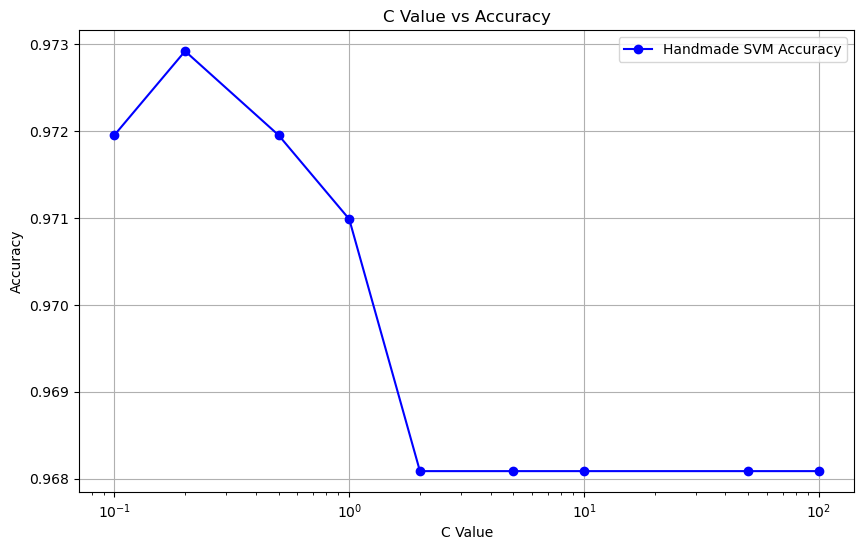

In [8]:
import matplotlib.pyplot as plt
# 提取 C 值和准确率
C_values = [item[0] for item in results]
accuracies = [item[1] for item in results]

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o', linestyle='-', color='b', label='Handmade SVM Accuracy')

# 设置标题和标签
plt.title('C Value vs Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log')  # 使用对数坐标显示 C 值，方便观察不同数量级的变化
plt.grid(True)
plt.legend()

# 显示图像
plt.show()